In [4]:
# Basic Template
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext nb_black
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from skimage.metrics import peak_signal_noise_ratio 
import cnnbin
from cnnbin.utils import psnr
from cnnbin.utils import clipto8bit


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [5]:
sigma = 50
image_ref = imageio.imread("data/monarch.bmp")
image = image_ref + sigma * np.random.standard_normal(image_ref.shape)

binned_ref = np.mean(cnnbin.split_diagonal_rgb(image_ref), 0)
binned_mean = np.mean(cnnbin.split_diagonal_rgb(image), 0)

print(f"Image of shape {image.shape}")

Image of shape (512, 768, 3)


<IPython.core.display.Javascript object>

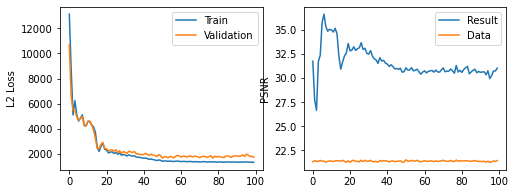

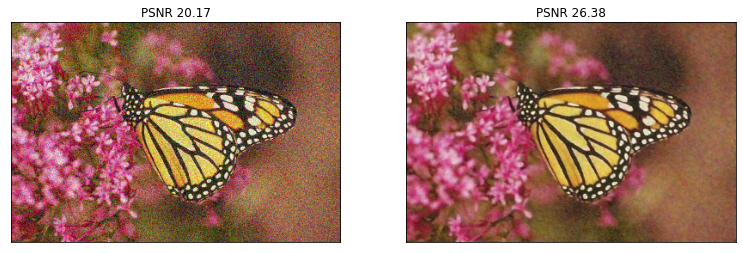

<IPython.core.display.Javascript object>

In [49]:
net = cnnbin.CNNbin(multichannel=True, depth=4, start_filts=48, augment=False)
net.train_random(image, samples=8, num_epochs=100, learning_rate=3e-4, alpha=0.95)
net.plot_train()
image_filter = clipto8bit(net.filter(image))
plt.figure(figsize=(13, 5))
for i, im in enumerate([binned_mean, image_filter]):
    plt.subplot(1, 2, 1 + i)
    plt.imshow(np.clip(im / 255.0, 0, 1))
    plt.title(f"PSNR {peak_signal_noise_ratio(binned_ref,im,data_range=255):.2f}")
    plt.xticks([])
    plt.yticks([])

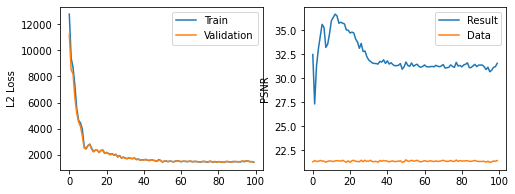

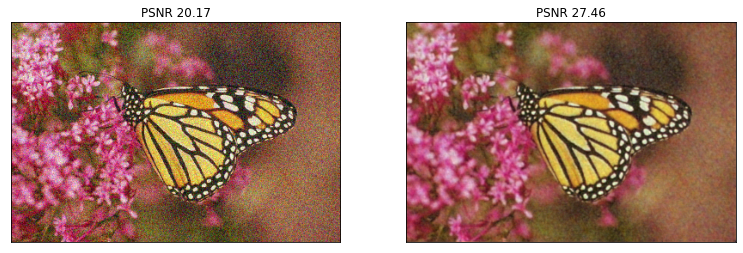

<IPython.core.display.Javascript object>

In [50]:
net = cnnbin.CNNbin(multichannel=True, depth=4, start_filts=48, augment=True)
net.train_random(image, samples=8, num_epochs=100, learning_rate=3e-4, alpha=0.95)
net.plot_train()
image_filter = clipto8bit(net.filter(image))
plt.figure(figsize=(13, 5))
for i, im in enumerate([binned_mean, image_filter]):
    plt.subplot(1, 2, 1 + i)
    plt.imshow(np.clip(im / 255.0, 0, 1))
    plt.title(f"PSNR {peak_signal_noise_ratio(binned_ref,im,data_range=255):.2f}")
    plt.xticks([])
    plt.yticks([])

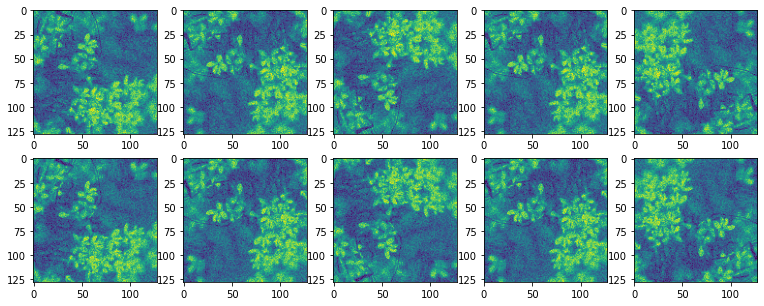

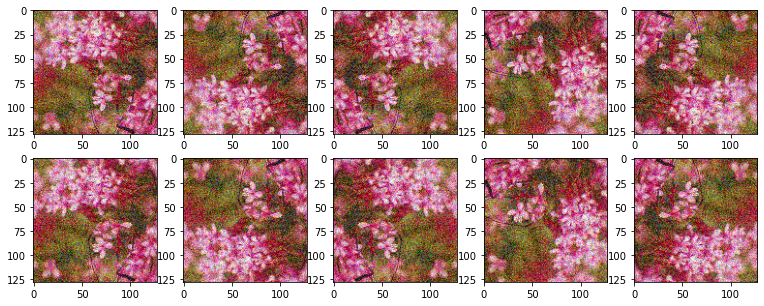

<IPython.core.display.Javascript object>

In [33]:
from cnnbin.dataset import N2NPatches, N2NMultiPatches

dataset = N2NPatches(
    np.mean(image,2), block_shape=(256, 256), sampling=4, random_seed=0, totorch=False, augment = True
)
nim = 5
f,ax = plt.subplots(ncols=nim, nrows = 2, figsize = (13,5))
for i in range(nim):
    a, b=dataset[0]
    ax[0,i].imshow(np.clip(a / 255.0, 0, 1))
    ax[1,i].imshow(np.clip(b / 255.0, 0, 1))

dataset = N2NPatches(
    image, block_shape=(256, 256), sampling=4, random_seed=0, totorch=False, augment = True
)
nim = 5
f,ax = plt.subplots(ncols=nim, nrows = 2, figsize = (13,5))
for i in range(nim):
    a, b=dataset[0]
    ax[0,i].imshow(np.clip(a / 255.0, 0, 1))
    ax[1,i].imshow(np.clip(b / 255.0, 0, 1))


d 576 720
ind0 449
ind1 593
d 512 768
ind0 385
ind1 641
d 361 250
ind0 234
ind1 123


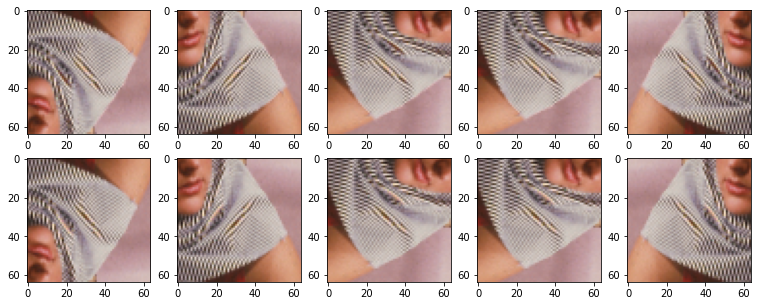

<IPython.core.display.Javascript object>

In [47]:
images = [
    imageio.imread(x)
    for x in ["data/barbara.bmp", "data/monarch.bmp", "data/comic.bmp"]
]
dataset = N2NMultiPatches(
    images,
    block_shape=(128, 128),
    sampling=4,
    random_seed=0,
    totorch=False,
    augment=True,
)
nim = 5
f, ax = plt.subplots(ncols=nim, nrows=2, figsize=(13, 5))
for i in range(nim):
    a, b = dataset[0]
    ax[0, i].imshow(np.clip(a / 255.0, 0, 1))
    ax[1, i].imshow(np.clip(b / 255.0, 0, 1))